In [1]:
library(GenomicRanges)
library(rtracklayer)
library(tidyverse)
library(ggpubr)
library(patchwork)
library(data.table)
library(motifmatchr)
library(ChrAccR)
library(SummarizedExperiment)

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ 

### read all TF data: cpm, motif matching

In [ ]:
deseq_dir <- "../../output/02-atac/04/deseq_data_Plate_TF_Dose/"
plotdir <- "../../plots/02-atac/18/"
outdir <- "../../output/02-atac/18/"

dir.create(plotdir, showWarnings = F, recursive=T)
dir.create(outdir, showWarnings = F, recursive=T)

In [ ]:
# read in ATAC CPM values
cpm_df <- read.csv("../../output/02-atac/01/cpm.tsv", sep=" ") # just use the cpm normalized peak count matrix
cpm_df %>% head
dim(cpm_df)

,X1_HEK293T_P1A2_SP4_d100,X2_HEK293T_P1B2_SP4_d100,X3_HEK293T_P1C2_ELF1_d100,X4_HEK293T_P1D2_ELF1_d100,X5_HEK293T_P1E2_FOXP1_d100,X6_HEK293T_P1F2_FOXP1_d100,X7_HEK293T_P1G2_GATA1_d100,X8_HEK293T_P1H2_GATA1_d100,X9_HEK293T_P1A3_SP4_d075,X10_HEK293T_P1B3_SP4_d075,⋯,X407_HEK293T_P3G11_SPI1_d005,X408_HEK293T_P3H11_SPI1_d005,X409_HEK293T_P3A12_GFP_d100,X410_HEK293T_P3B12_GFP_d100,X411_HEK293T_P3C12_tetCTCF_d100,X412_HEK293T_P3D12_tetCTCF_d100,X413_HEK293T_P3E12_GFP_d100,X414_HEK293T_P3F12_GFP_d100,X415_HEK293T_P3G12_negctl_d100,X416_HEK293T_P3H12_negctl_d100
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HEK293T_P3A12_GFP_d100_peak_1,1.588078,0.8776116,0.8770458,1.688634,2.175640,1.393018,1.558472,1.6576188,1.483490,0.425564,⋯,1.1968762,1.770908,2.7855153,1.8936426,1.1304493,1.8257871,0.7031904,1.0822624,2.313741,1.4081195
HEK293T_P3A12_GFP_d100_peak_17,6.087634,8.9955187,8.9897199,9.118624,8.857964,10.795892,8.500757,8.6564539,8.900937,5.957896,⋯,9.1760505,7.083633,9.2850511,7.5745705,7.3479207,7.9117439,9.1414749,6.8543286,7.519658,8.4487170
HEK293T_P3G8_SPI1_d075_peak_6,1.588078,3.0716405,1.0963073,1.688634,2.175640,2.263655,0.991755,2.0259786,1.483490,1.276692,⋯,0.7979174,2.361211,4.6425255,2.3670533,1.6956740,0.6085957,2.8127615,0.3607541,1.156870,0.7040597
HEK293T_P1B6_SP4_d005_peak_3,1.323399,1.7552232,2.4118761,3.714995,3.263461,3.134291,3.116944,2.2101584,2.472483,1.276692,⋯,1.1968762,1.770908,2.7855153,0.9468213,0.5652247,2.4343827,1.4063807,2.1645248,4.627482,3.5202987
HEK293T_P3G7_SPI1_d100_peak_10,2.382118,0.8776116,2.8503990,1.350907,2.020237,1.393018,1.416793,0.3683597,0.988993,1.702256,⋯,2.7927110,2.361211,0.9285051,1.4202320,0.5652247,1.2171914,NA,1.4430165,1.156870,1.4081195
HEK293T_P3F10_SPI1_d025_peak_18,2.117438,1.7552232,3.2889219,3.039541,2.952655,3.482546,3.967020,4.2361370,3.461476,2.553384,⋯,2.7927110,1.180605,3.7140204,5.2075172,0.5652247,1.8257871,0.7031904,4.3290496,NA,0.7040597


[1] 608176    252

In [ ]:
# read the motif matching results
motif.scores <- readRDS("../../output/02-atac/03/motif.scores.JASPAR2020.rds") # this is JASPAR motifs
motif.scores

if (is.null(rownames(motif.scores))){
    # read in the motif peak names
    dsa_norm <- loadDsAcc('../../output/02-atac/01/dsa_norm_rpkmlog2quantile/')
    region <- "filteredConsensus"

    Peaks <- as.data.frame(dsa_norm@coord[[region]],row.names = NULL, stringsAsFactors=FALSE) %>%
    dplyr::select(c("seqnames","start","end","name"))
    rownames(motif.scores) <- Peaks$name
    Peaks <- GRanges(Peaks)
}

class: RangedSummarizedExperiment 
dim: 608176 633 
metadata(0):
assays(3): motifScores motifMatches motifCounts
rownames(608176): HEK293T_P3A12_GFP_d100_peak_1
  HEK293T_P3A12_GFP_d100_peak_17 ...
  HEK293T_P3A12_GFP_d100_peak_1824818
  HEK293T_P2D8_ALX4_d075_peak_271879
rowData names(0):
colnames(633): MA0030.1_FOXF2 MA0031.1_FOXD1 ... MA0528.2_ZNF263
  MA0609.2_CREM
colData names(1): name

### read chromhmm annotations

In [5]:
bed <- fread(paste0(outdir,"/hg38lift_genome_100_segments.bed.gz"), sep="\t")
colnames(bed) <- c("chrom", "chromStart", "chromEnd", "name")
bed <- GRanges(bed)
# findOverlap is end inclusive so change the chromhmm annot ranges to end-1
ranges(bed) <- IRanges(start=ranges(bed)@start, width=ranges(bed)@width - 1)
bed

GRanges object with 6099638 ranges and 1 metadata column:
            seqnames            ranges strand |        name
               <Rle>         <IRanges>  <Rle> | <character>
        [1]     chr1       10000-10399      * |  1_GapArtf2
        [2]     chr1       10400-10599      * |    26_Acet1
        [3]     chr1       10600-10799      * |   37_EnhWk4
        [4]     chr1       10800-12799      * |  0_GapArtf1
        [5]     chr1       12800-12999      * |   37_EnhWk4
        ...      ...               ...    ... .         ...
  [6099634]     chrY 56886253-56886452      * |     12_HET5
  [6099635]     chrY 56886453-56886852      * |  1_GapArtf2
  [6099636]     chrY 56886853-56887052      * |     12_HET5
  [6099637]     chrY 56887053-56887252      * |     13_HET6
  [6099638]     chrY 56887253-57217248      * |  0_GapArtf1
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

### inputs

In [56]:
# inputs
motif_code_ls <- c(
                   "ALX4"="MA0681.2_PHOX2B",
                   "ELF1"="MA0473.3_ELF1",
                   "IRF4"="MA1419.1_IRF4",
                   "KLF1"="MA0039.4_KLF4",
                   "KLF4"="MA0039.4_KLF4",
                   "LEF1"="MA0768.1_LEF1",
                #    "NR4A1"="MA1112.2_NR4A1", # doesnt run, no peaks in some groups
                   "OCT4"="MA1115.1_POU5F1",
                   "PRDM1"="MA0508.3_PRDM1",
                   "SOX2"="MA0143.4_SOX2",
                   "SP4"="MA0685.1_SP4",
                   "SPI1"="MA0080.5_SPI1",
                   "TCF3"="MA0522.3_TCF3")

group1 = "GFP_1" # reference level
region = "filteredConsensus"

i = 12
TF = names(motif_code_ls)[i]
group2 = paste0(TF, "_1")
motif_code = motif_code_ls[i]

### read TF specific ATAC CPM, motif matching, differential analysis and sensitivity analysis results

In [57]:
cpm <- cpm_df[,c(grep("GFP", colnames(cpm_df)), grep(TF, colnames(cpm_df)))]
cpm %>% head
dim(cpm)

,X81_HEK293T_P1A12_GFP_d100,X82_HEK293T_P1B12_GFP_d100,X245_HEK293T_P2A12_GFP_d100,X246_HEK293T_P2B12_GFP_d100,X409_HEK293T_P3A12_GFP_d100,X410_HEK293T_P3B12_GFP_d100,X413_HEK293T_P3E12_GFP_d100,X414_HEK293T_P3F12_GFP_d100,X209_HEK293T_P2E7_TCF3_d100,X210_HEK293T_P2F7_TCF3_d100,X217_HEK293T_P2E8_TCF3_d075,X218_HEK293T_P2F8_TCF3_d075,X225_HEK293T_P2E9_TCF3_d050,X226_HEK293T_P2F9_TCF3_d050,X233_HEK293T_P2E10_TCF3_d025,X234_HEK293T_P2F10_TCF3_d025,X241_HEK293T_P2E11_TCF3_d005,X242_HEK293T_P2F11_TCF3_d005
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HEK293T_P3A12_GFP_d100_peak_1,1.466495,1.566060,1.0934822,0.2761946,2.7855153,1.8936426,0.7031904,1.0822624,0.5449914,1.1310029,1.0151701,0.4203265,0.7844106,0.7192666,0.3483234,NA,0.3605537,0.6836667
HEK293T_P3A12_GFP_d100_peak_17,10.632089,9.983635,6.5608929,4.1429185,9.2850511,7.5745705,9.1414749,6.8543286,4.4961787,3.2516335,4.0606805,3.9230477,3.5298478,4.1957220,4.5282046,3.2295187,4.8674749,5.9820838
HEK293T_P3G8_SPI1_d075_peak_6,1.466495,1.566060,1.0934822,2.2095566,4.6425255,2.3670533,2.8127615,0.3607541,1.7712219,1.6965044,0.4350729,0.5604354,0.9151457,0.7192666,0.5224851,1.0765062,0.7211074,0.5127500
HEK293T_P1B6_SP4_d005_peak_3,2.199742,2.349091,3.2804465,2.2095566,2.7855153,0.9468213,1.4063807,2.1645248,0.4087435,0.7068768,0.7251215,0.9807619,0.9151457,1.1987777,1.0449703,1.0765062,1.2619379,1.1964168
HEK293T_P3G7_SPI1_d100_peak_10,1.466495,1.957575,1.4579762,0.5523891,0.9285051,1.4202320,NA,1.4430165,0.1362478,0.9896276,0.2900486,0.2802177,0.1307351,0.7192666,0.5224851,0.5382531,0.7211074,0.5127500
HEK293T_P3F10_SPI1_d025_peak_18,3.299614,2.544848,0.7289881,1.6571674,3.7140204,5.2075172,0.7031904,4.3290496,0.5449914,1.6965044,1.0151701,0.9807619,1.5688212,1.5584110,1.3932937,1.0765062,1.4422148,2.0510002


[1] 608176     18

In [ ]:
# identify peaks containing target motif
target_motif_counts <- rowSums(motifCounts(motif.scores[,motif_code]))
subset <- motif.scores[(target_motif_counts > 0), motif_code]
meta <- read.table(paste0("../../output/02-atac/10/", TF,"_motif_containing_peak_meta.tsv"), row.names=1, sep="\t")
rowData(subset) <- meta[rownames(subset),]
subset

class: RangedSummarizedExperiment 
dim: 81964 1 
metadata(0):
assays(3): motifScores motifMatches motifCounts
rownames(81964): HEK293T_P3G8_SPI1_d075_peak_6
  HEK293T_P3A12_GFP_d100_peak_56 ...
  HEK293T_P3A12_GFP_d100_peak_1824788
  HEK293T_P3C3_KLF4_d075_peak_1358715
rowData names(6): sensitive saturating ... state group
colnames(1): MA0522.3_TCF3
colData names(1): name

### stats on motif counts and motif scores per peak group

In [318]:
# inspect motif count distribution
tmp <- motifCounts(subset) %>% as.numeric
p1 <- gghistogram(tmp) + xlab(paste0(motif_code, " motif counts"))

# add meta, motif count bin
# bin everything over 95 percentile
rowData(subset)$motif_count_bin <- tmp
q95 <- quantile(tmp, 0.95) %>% as.integer
rowData(subset)[(rowData(subset)$motif_count_bin) > q95, "motif_count_bin"] <- paste0(">",q95)
tmplevels <- rowData(subset)$motif_count_bin %>% unique %>% sort
tmplevels <- tmplevels[c(2:length(tmplevels),1)] # move the ">#" to last level
rowData(subset)$motif_count_bin <- factor(rowData(subset)$motif_count_bin, levels=tmplevels)
p2 <- ggplot(rowData(subset) %>% as.data.frame, aes(fill=motif_count_bin, x=group)) + geom_bar(position="stack",stat="count") + theme_classic() +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + ylab("peak count")
p3 <- ggplot(rowData(subset) %>% as.data.frame, aes(fill=motif_count_bin, x=group)) + geom_bar(position="fill",stat="count") + theme_classic() +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + ylab("percentage of peaks")
p4 <- ggplot(rowData(subset) %>% as.data.frame, aes(x=motif_count_bin, fill=group)) + geom_bar(position="stack",stat="count") + theme_classic() +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + ylab("peak count")
p5 <- ggplot(rowData(subset) %>% as.data.frame, aes(x=motif_count_bin, fill=group)) + geom_bar(position="fill",stat="count") + theme_classic() +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + ylab("percentage of peaks")

Warning message:
“Using `bins = 30` by default. Pick better value with the argument `bins`.”


In [319]:
# inspect motif score distribution
tmp <- motifScores(subset) %>% as.numeric
p6 <- gghistogram(tmp) + xlab(paste0(motif_code, " motif score"))

# add meta, motif score bin
rowData(subset)$motif_score_bin <- cut(tmp, breaks = 5) %>% as.integer %>% as.factor
p7 <- ggplot(rowData(subset) %>% as.data.frame, aes(fill=motif_score_bin, x=group)) + geom_bar(position="stack",stat="count") + theme_classic() +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + ylab("peak count")
p8 <- ggplot(rowData(subset) %>% as.data.frame, aes(fill=motif_score_bin, x=group)) + geom_bar(position="fill",stat="count") + theme_classic() +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + ylab("percentage of peaks")
p9 <- ggplot(rowData(subset) %>% as.data.frame, aes(x=motif_score_bin, fill=group)) + geom_bar(position="stack",stat="count") + theme_classic() +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + ylab("peak count")
p10 <- ggplot(rowData(subset) %>% as.data.frame, aes(x=motif_score_bin, fill=group)) + geom_bar(position="fill",stat="count") + theme_classic() +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + ylab("percentage of peaks")

Warning message:
“Using `bins = 30` by default. Pick better value with the argument `bins`.”


In [320]:
pdf(paste0(plotdir, "/", TF,"_summary_motifcount_motifscore.pdf"), width=7, height=7)
lapply(paste0("p",1:10), function(n){get(n)})
dev.off()

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]

[[9]]

[[10]]


png 
  2

### overlap peaks with chromhmm annotations (500bp width)

In [322]:
# # overlap each group of peaks with ChIP signal
# query2 <- subset@rowRanges[which(rowData(subset)$saturating=="No")]
# overlap2 <- findOverlaps(query2, bed, ignore.strand=FALSE)
# length(overlap2)

[1] 0

In [323]:
# # overlap each group of peaks with ChIP signal
# query3 <- subset@rowRanges[which(rowData(subset)$state=="open")]
# overlap3 <- findOverlaps(query3, bed, ignore.strand=FALSE)
# length(overlap3)

[1] 28910

In [324]:
# # overlap each group of peaks with ChIP signal
# query4 <- subset@rowRanges[which(rowData(subset)$state=="closed")]
# overlap4 <- findOverlaps(query4, bed, ignore.strand=FALSE)
# length(overlap4)

[1] 76966

In [ ]:
# df <- bed[overlap1@to]$name %>% table %>% as.data.frame
# colnames(df) <- c("state", "saturating_sensitive")
# df <- merge(df,bed[overlap2@to]$name %>% table %>% as.data.frame %>% dplyr::rename(state=".", nonsaturating_sensitive="Freq"), all=T )
# df <- merge(df,bed[overlap3@to]$name %>% table %>% as.data.frame %>% dplyr::rename(state=".", open_nonsensitive="Freq"), all=T )
# df <- merge(df,bed[overlap4@to]$name %>% table %>% as.data.frame %>% dplyr::rename(state=".", closed_nonsensitive="Freq"), all=T )
# df[is.na(df)] <- 0

# df$id <- lapply(as.character(df$state), function(n){strsplit(n,"_")[[1]][1]}) %>% unlist %>% as.integer
# df <- df %>% arrange(id)
# df$state <- factor(df$state, levels=df$state)
# df %>% head

In [ ]:
# df_density <- t(t(df[2:5])/colSums(df[2:5])) %>% as.data.frame
# df_density$state <- df$state
# df_density <- melt(df_density)
# colnames(df_density) <- c("state", "peak_group", "pct.hits")
# # add a broad group 
# df_density$state_group <- lapply(as.character(df_density$state), function(n){gsub("[0-9]*$", "",strsplit(n, split="_")[[1]][2])}) %>% unlist
# df_density$state_group <- factor(df_density$state_group, levels=df_density$state_group%>% unique)
# df_density %>% head

Warning message in melt(df_density):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(df_density). In the next version, this warning will become an error.”
Using state as id variables



,state,peak_group,pct.hits,state_group
,<fct>,<fct>,<dbl>,<fct>
1,0_GapArtf1,saturating_sensitive,6.461804e-03,GapArtf
2,1_GapArtf2,saturating_sensitive,2.153935e-04,GapArtf
3,2_GapArtf3,saturating_sensitive,7.179782e-05,GapArtf
4,3_Quies1,saturating_sensitive,1.341183e-01,Quies
5,4_Quies2,saturating_sensitive,2.821654e-02,Quies
6,5_Quies3,saturating_sensitive,1.540781e-01,Quies


In [ ]:
# df_group_density <- df_density %>% group_by(peak_group,state_group) %>% summarise(pct.hits=sum(pct.hits))
# df_group_density %>% head

`summarise()` has grouped output by 'peak_group'. You can override using the
`.groups` argument.


peak_group,state_group,pct.hits
<fct>,<fct>,<dbl>
saturating_sensitive,GapArtf,0.006748995
saturating_sensitive,Quies,0.328044227
saturating_sensitive,HET,0.005672028
saturating_sensitive,ReprPC,0.042001723
saturating_sensitive,Acet,0.046309592
saturating_sensitive,EnhWk,0.163124641


In [ ]:
# p1 <- ggbarplot(df_density, x="state", y="pct.hits", facet.by = "peak_group") + ylab("fraction hits") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1,size=8),text = element_text(size = 28))
# p2 <- ggbarplot(df_density, x="state", y="pct.hits", facet.by = "peak_group", fill="state",color=NA) + ylab("fraction hits") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1,size=8),text = element_text(size = 28))
# p3 <- ggplot(df_density, aes(x=state, y=pct.hits, fill=peak_group)) + geom_col(position="dodge") + ylab("fraction hits")  + theme_classic()+ theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=8),text = element_text(size = 28),legend.position="top")
# p4 <- ggbarplot(df_group_density, x="state_group", y="pct.hits", facet.by = "peak_group", fill="darkgray", color=NA) + ylab("fraction hits") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),text = element_text(size = 28))
# p5 <- ggbarplot(df_group_density, x="state_group", y="pct.hits", facet.by = "peak_group", fill="state_group", color=NA) + ylab("fraction hits") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),text = element_text(size = 28))
# p6 <- ggplot(df_group_density, aes(x=state_group, y=pct.hits, fill=peak_group)) + geom_col(position="dodge") + ylab("fraction hits")  + theme_classic()+ theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),text = element_text(size = 28),legend.position="top")

# pdf(paste0(plotdir, "/", TF,"_chromHMM_annot.pdf"), width=20, height=20)
# lapply(paste0("p",1:6),function(n){get(n)})
# dev.off()

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]


png 
  2

### overlap all peaks with chromhmm, 1:1 association (summit only)

In [59]:
query <- subset@rowRanges
ranges(query) <- IRanges(start=query@ranges@start + (query@ranges@width-1)%/%2, width=1)
overlap <- findOverlaps(query, bed, ignore.strand=FALSE)
overlap <- overlap[!duplicated(overlap@from)] # remove any duplicate peak state annots 
length(overlap)

[1] 81586

In [60]:
peak_to_state <- DataFrame(peakname=rownames(subset)[overlap@from], chromhmm_state=bed[overlap@to]$name)
peak_to_state
write.table(peak_to_state, paste0(outdir, "/", TF,"_chromHMM_annot_1to1_peak2state.csv"), sep=",", quote=F, row.names=F)

DataFrame with 81586 rows and 2 columns
                    peakname chromhmm_state
                 <character>    <character>
1     HEK293T_P3G8_SPI1_d0..        98_TSS1
2     HEK293T_P3A12_GFP_d1..      86_DNase1
3     HEK293T_P2E7_TCF3_d1..     25_ReprPC9
4     HEK293T_P2F7_TCF3_d1..     18_ReprPC2
5     HEK293T_P3E2_KLF1_d1..    89_BivProm3
...                      ...            ...
81582 HEK293T_P3F10_SPI1_d..        14_HET7
81583 HEK293T_P3H2_KLF1_d1..       71_TxWk2
81584 HEK293T_P1A7_BACH2_d..        13_HET6
81585 HEK293T_P3A12_GFP_d1..      63_TxEnh2
81586 HEK293T_P3C3_KLF4_d0..        14_HET7

### overlap peaks with chromhmm annotations (summit only)

In [9]:
# saturating sensitive
query1 <- subset@rowRanges[which(rowData(subset)$saturating=="Yes")]
ranges(query1) <- IRanges(start=query1@ranges@start + (query1@ranges@width-1)%/%2, width=1)
overlap1 <- findOverlaps(query1, bed, ignore.strand=FALSE)
overlap1 <- overlap1[!duplicated(overlap1@from)] # remove any duplicate peak state annots 
length(overlap1)

[1] 15807

In [10]:
# nonsaturating sensitive
query2 <- subset@rowRanges[which(rowData(subset)$saturating=="No")]
ranges(query2) <- IRanges(start=query2@ranges@start + (query2@ranges@width-1)%/%2, width=1)
overlap2 <- findOverlaps(query2, bed, ignore.strand=FALSE)
overlap2 <- overlap2[!duplicated(overlap2@from)]
length(overlap2)

[1] 3709

In [11]:
# open nonsensitive
query3 <- subset@rowRanges[which(rowData(subset)$state=="open")]
ranges(query3) <- IRanges(start=query3@ranges@start + (query3@ranges@width-1)%/%2, width=1)
overlap3 <- findOverlaps(query3, bed, ignore.strand=FALSE)
overlap3 <- overlap3[!duplicated(overlap3@from)]
length(overlap3)

[1] 16740

In [12]:
# closed nonsensitive
query4 <- subset@rowRanges[which(rowData(subset)$state=="closed")]
ranges(query4) <- IRanges(start=query4@ranges@start + (query4@ranges@width-1)%/%2, width=1)
overlap4 <- findOverlaps(query4, bed, ignore.strand=FALSE)
overlap4 <- overlap4[!duplicated(overlap4@from)]
length(overlap4)

[1] 102642

In [13]:
df <- bed[overlap1@to]$name %>% table %>% as.data.frame
colnames(df) <- c("state", "saturating_sensitive")
df <- merge(df,bed[overlap2@to]$name %>% table %>% as.data.frame %>% dplyr::rename(state=".", nonsaturating_sensitive="Freq"), all=T )
df <- merge(df,bed[overlap3@to]$name %>% table %>% as.data.frame %>% dplyr::rename(state=".", open_nonsensitive="Freq"), all=T )
df <- merge(df,bed[overlap4@to]$name %>% table %>% as.data.frame %>% dplyr::rename(state=".", closed_nonsensitive="Freq"), all=T )
df[is.na(df)] <- 0

df$id <- lapply(as.character(df$state), function(n){strsplit(n,"_")[[1]][1]}) %>% unlist %>% as.integer
df <- df %>% arrange(id)
df$state <- factor(df$state, levels=df$state)
df %>% head

,state,saturating_sensitive,nonsaturating_sensitive,open_nonsensitive,closed_nonsensitive,id
,<fct>,<int>,<dbl>,<int>,<int>,<int>
1,0_GapArtf1,20,2,3,509,0
2,1_GapArtf2,3,0,6,12,1
3,2_GapArtf3,1,0,7,1,2
4,3_Quies1,431,100,151,8040,3
5,4_Quies2,538,142,141,2444,4
6,5_Quies3,537,135,149,8037,5


In [ ]:
df_density <- t(t(df[2:5])/colSums(df[2:5])) %>% as.data.frame
df_density$state <- df$state
df_density <- melt(df_density)
colnames(df_density) <- c("state", "peak_group", "pct.peaks")
# add a broad group 
df_density$state_group <- lapply(as.character(df_density$state), function(n){gsub("[0-9]*$", "",strsplit(n, split="_")[[1]][2])}) %>% unlist
df_density$state_group <- factor(df_density$state_group, levels=df_density$state_group%>% unique)
df_density %>% head

Warning message in melt(df_density):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(df_density). In the next version, this warning will become an error.”
Using state as id variables



,state,peak_group,pct.peaks,state_group
,<fct>,<fct>,<dbl>,<fct>
1,0_GapArtf1,saturating_sensitive,0.0075390415,GapArtf
2,1_GapArtf2,saturating_sensitive,0.0000000000,GapArtf
3,2_GapArtf3,saturating_sensitive,0.0001346257,GapArtf
4,3_Quies1,saturating_sensitive,0.1873990307,Quies
5,4_Quies2,saturating_sensitive,0.0210016155,Quies
6,5_Quies3,saturating_sensitive,0.1459343026,Quies


In [ ]:
df_group_density <- df_density %>% group_by(peak_group,state_group) %>% summarise(pct.peaks=sum(pct.peaks))
df_group_density %>% head

`summarise()` has grouped output by 'peak_group'. You can override using the
`.groups` argument.


peak_group,state_group,pct.peaks
<fct>,<fct>,<dbl>
saturating_sensitive,GapArtf,0.007673667
saturating_sensitive,Quies,0.366316640
saturating_sensitive,HET,0.003904146
saturating_sensitive,ReprPC,0.043887991
saturating_sensitive,Acet,0.030694669
saturating_sensitive,EnhWk,0.164781906


In [ ]:
p1 <- ggbarplot(df_density, x="state", y="pct.peaks", facet.by = "peak_group") + ylab("fraction peaks") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1,size=8),text = element_text(size = 28))
p2 <- ggbarplot(df_density, x="state", y="pct.peaks", facet.by = "peak_group", fill="state",color=NA) + ylab("fraction peaks") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1,size=8),text = element_text(size = 28))
p3 <- ggplot(df_density, aes(x=state, y=pct.peaks, fill=peak_group)) + geom_col(position="dodge") + ylab("fraction peaks")  + theme_classic()+ theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=8),text = element_text(size = 28),legend.position="top")
p4 <- ggbarplot(df_group_density, x="state_group", y="pct.peaks", facet.by = "peak_group", fill="darkgray", color=NA) + ylab("fraction peaks") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),text = element_text(size = 28))
p5 <- ggbarplot(df_group_density, x="state_group", y="pct.peaks", facet.by = "peak_group", fill="state_group", color=NA) + ylab("fraction peaks") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),text = element_text(size = 28))
p6 <- ggplot(df_group_density, aes(x=state_group, y=pct.peaks, fill=peak_group)) + geom_col(position="dodge") + ylab("fraction peaks")  + theme_classic()+ theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),text = element_text(size = 28),legend.position="top")

pdf(paste0(plotdir, "/", TF,"_chromHMM_annot_summitonly.pdf"), width=20, height=20)
lapply(paste0("p",1:6),function(n){get(n)})
dev.off()

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]


png 
  2

### Enrichment test for chromHMM states

In [ ]:
# generate a random set of peaks as bgd
# overlap random bgd of peaks with ChIP signal
set.seed(1)
bgd <- sample(1:length(subset), length(query1), replace=FALSE)

query1b <- subset@rowRanges[bgd]
ranges(query1b) <- IRanges(start=query1b@ranges@start + (query1b@ranges@width-1)%/%2, width=1)
overlap1b <- findOverlaps(query1b, bed, ignore.strand=FALSE)
overlap1b <- overlap1b[!duplicated(overlap1b@from)]
length(overlap1b)

[1] 7421

In [ ]:
# generate a random set of peaks as bgd
# overlap random bgd of peaks with ChIP signal
set.seed(2)
bgd <- sample(1:length(subset), length(query2), replace=FALSE)

query2b <- subset@rowRanges[bgd]
ranges(query2b) <- IRanges(start=query2b@ranges@start + (query2b@ranges@width-1)%/%2, width=1)
overlap2b <- findOverlaps(query2b, bed, ignore.strand=FALSE)
overlap2b <- overlap2b[!duplicated(overlap2b@from)]
length(overlap2b)

[1] 1502

In [ ]:
# generate a random set of peaks as bgd
# overlap random bgd of peaks with ChIP signal
set.seed(3)
bgd <- sample(1:length(subset), length(query3), replace=FALSE)

query3b <- subset@rowRanges[bgd]
ranges(query3b) <- IRanges(start=query3b@ranges@start + (query3b@ranges@width-1)%/%2, width=1)
overlap3b <- findOverlaps(query3b, bed, ignore.strand=FALSE)
overlap3b <- overlap3b[!duplicated(overlap3b@from)]
length(overlap3b)

[1] 5140

In [ ]:
# generate a random set of peaks as bgd
# overlap random bgd of peaks with ChIP signal
set.seed(4)
bgd <- sample(1:length(subset), length(query4), replace=FALSE)

query4b <- subset@rowRanges[bgd]
ranges(query4b) <- IRanges(start=query4b@ranges@start + (query4b@ranges@width-1)%/%2, width=1)
overlap4b <- findOverlaps(query4b, bed, ignore.strand=FALSE)
overlap4b <- overlap4b[!duplicated(overlap4b@from)]
length(overlap4b)

[1] 39315

In [ ]:
dfbgd <- bed[overlap1b@to]$name %>% table %>% as.data.frame
colnames(dfbgd) <- c("state", "saturating_sensitive")
dfbgd <- merge(dfbgd,bed[overlap2b@to]$name %>% table %>% as.data.frame %>% dplyr::rename(state=".", nonsaturating_sensitive="Freq"), all=T )
dfbgd <- merge(dfbgd,bed[overlap3b@to]$name %>% table %>% as.data.frame %>% dplyr::rename(state=".", open_nonsensitive="Freq"), all=T )
dfbgd <- merge(dfbgd,bed[overlap4b@to]$name %>% table %>% as.data.frame %>% dplyr::rename(state=".", closed_nonsensitive="Freq"), all=T )
dfbgd[is.na(dfbgd)] <- 0


dfbgd$id <- lapply(as.character(dfbgd$state), function(n){strsplit(n,"_")[[1]][1]}) %>% unlist %>% as.integer
dfbgd <- dfbgd %>% arrange(id)
dfbgd$state <- factor(dfbgd$state, levels=dfbgd$state)
dfbgd%>% head

,state,saturating_sensitive,nonsaturating_sensitive,open_nonsensitive,closed_nonsensitive,id
,<fct>,<int>,<dbl>,<dbl>,<int>,<int>
1,0_GapArtf1,44,10,31,297,0
2,1_GapArtf2,1,0,0,8,1
3,2_GapArtf3,2,0,0,3,2
4,3_Quies1,860,177,581,4589,3
5,4_Quies2,158,34,106,863,4
6,5_Quies3,798,154,500,3911,5


In [ ]:
dfbgd_melt <- melt(dfbgd[1:5], value.name = "npeaks", variable.name = "peak_group")
# add a broad group 
dfbgd_melt$state_group <- lapply(as.character(dfbgd_melt$state), function(n){gsub("[0-9]*$", "",strsplit(n, split="_")[[1]][2])}) %>% unlist
dfbgd_melt$state_group <- factor(dfbgd_melt$state_group, levels=dfbgd_melt$state_group%>% unique)
dfbgd_groupsum <- dfbgd_melt %>% group_by(peak_group,state_group) %>% summarise(bgd=sum(npeaks))
dfbgd_groupsum %>% head

Warning message in melt(dfbgd[1:5], value.name = "npeaks", variable.name = "peak_group"):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(dfbgd[1:5]). In the next version, this warning will become an error.”
Using state as id variables

`summarise()` has grouped output by 'peak_group'. You can override using the
`.groups` argument.


peak_group,state_group,bgd
<fct>,<fct>,<dbl>
saturating_sensitive,GapArtf,47
saturating_sensitive,Quies,1997
saturating_sensitive,HET,166
saturating_sensitive,ReprPC,479
saturating_sensitive,Acet,427
saturating_sensitive,EnhWk,1061


In [ ]:
df_melt <- melt(df[1:5], value.name = "npeaks", variable.name = "peak_group")
# add a broad group 
df_melt$state_group <- lapply(as.character(df_melt$state), function(n){gsub("[0-9]*$", "",strsplit(n, split="_")[[1]][2])}) %>% unlist
df_melt$state_group <- factor(df_melt$state_group, levels=df_melt$state_group%>% unique)
df_groupsum <- df_melt %>% group_by(peak_group,state_group) %>% summarise(fgd=sum(npeaks))
df_groupsum %>% head

Warning message in melt(df[1:5], value.name = "npeaks", variable.name = "peak_group"):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(df[1:5]). In the next version, this warning will become an error.”
Using state as id variables

`summarise()` has grouped output by 'peak_group'. You can override using the
`.groups` argument.


peak_group,state_group,fgd
<fct>,<fct>,<dbl>
saturating_sensitive,GapArtf,57
saturating_sensitive,Quies,2721
saturating_sensitive,HET,29
saturating_sensitive,ReprPC,326
saturating_sensitive,Acet,228
saturating_sensitive,EnhWk,1224


In [ ]:
merged_groupsum <- merge(df_groupsum, dfbgd_groupsum, by = c("peak_group", "state_group"))
merged_groupsum$fc <- merged_groupsum$fgd / merged_groupsum$bgd
merged_groupsum$log2fc <- log2(merged_groupsum$fc)
merged_groupsum %>% head

,peak_group,state_group,fgd,bgd,fc,log2fc
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,closed_nonsensitive,Acet,2599,2343,1.1092616,0.14959968
2,closed_nonsensitive,BivProm,601,774,0.7764858,-0.36496858
3,closed_nonsensitive,DNase,397,832,0.4771635,-1.06744452
4,closed_nonsensitive,EnhA,7790,7583,1.0272979,0.03885461
5,closed_nonsensitive,EnhWk,5536,5345,1.0357343,0.05065400
6,closed_nonsensitive,GapArtf,340,308,1.1038961,0.14260440


In [ ]:
# fisher's exact test to get a p value
# confusion matrix # peaks: 
#           | peak group |  bgd  |
#---------------------------------
# state1    |            |       |
# not state1|            |       |
merged_groupsum$notstate_fgd <- NA
merged_groupsum$notstate_bgd <- NA
for (pgroup in unique(merged_groupsum$peak_group)){
    mask <- (merged_groupsum$peak_group==pgroup)
    sumfgd <- sum(merged_groupsum[mask,"fgd"])
    sumbgd <- sum(merged_groupsum[mask,"bgd"])
    merged_groupsum[mask,"notstate_fgd"] <- sumfgd - merged_groupsum[mask,"fgd"]
    merged_groupsum[mask,"notstate_bgd"] <- sumbgd - merged_groupsum[mask,"bgd"]
}
nstategroup <- length(unique(merged_groupsum$state_group))
merged_groupsum$pval <- lapply(1:dim(merged_groupsum)[1],function(i){fisher.test(rbind(merged_groupsum[i,c("fgd","bgd")] %>% as.numeric,
                               merged_groupsum[i,c("notstate_fgd","notstate_bgd")] %>% as.numeric), 
                        alternative = "two.sided")$p.value}) %>% unlist 
merged_groupsum$padj <- lapply(1:dim(merged_groupsum)[1],function(i){fisher.test(rbind(merged_groupsum[i,c("fgd","bgd")] %>% as.numeric,
                               merged_groupsum[i,c("notstate_fgd","notstate_bgd")] %>% as.numeric), 
                        alternative = "two.sided")$p.value * nstategroup}) %>% unlist # bonferroni correction
merged_groupsum$neglog10pval <- -log10(merged_groupsum$pval)
merged_groupsum$neglog10padj <- -log10(merged_groupsum$padj)
merged_groupsum$significant <- (merged_groupsum$padj<0.05) %>% as.numeric
merged_groupsum$significant <- factor(merged_groupsum$significant, levels=c(1,0))
merged_groupsum <- merged_groupsum %>% na.omit
merged_groupsum %>% head

,peak_group,state_group,fgd,bgd,fc,log2fc,notstate_fgd,notstate_bgd,pval,padj,neglog10pval,neglog10padj,significant
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,closed_nonsensitive,Acet,2599,2343,1.1092616,0.14959968,36696,36972,1.587637e-04,2.540219e-03,3.7992488,2.59512881,1
2,closed_nonsensitive,BivProm,601,774,0.7764858,-0.36496858,38694,38541,2.797623e-06,4.476197e-05,5.5532108,4.34909084,1
3,closed_nonsensitive,DNase,397,832,0.4771635,-1.06744452,38898,38483,1.856737e-36,2.970779e-35,35.7312496,34.52712961,1
4,closed_nonsensitive,EnhA,7790,7583,1.0272979,0.03885461,31505,31732,5.897046e-02,9.435274e-01,1.2293655,0.02524548,0
5,closed_nonsensitive,EnhWk,5536,5345,1.0357343,0.05065400,33759,33970,4.622462e-02,7.395938e-01,1.3351267,0.13100671,0
6,closed_nonsensitive,GapArtf,340,308,1.1038961,0.14260440,38955,39007,2.070560e-01,3.312896e+00,0.6839122,-0.52020776,0


In [ ]:
merged_groupsum[is.infinite(merged_groupsum$neglog10padj), "neglog10padj"] <- 312 # floor the inf values
write.table(merged_groupsum, paste0(outdir, "/", TF, "_chromHMM_annot_summitonly_enrichment.txt"), quote=FALSE, row.names=FALSE)

In [ ]:

p1 <- ggbarplot(merged_groupsum, x="state_group", y="log2fc", facet.by = "peak_group", fill = "state_group") + ylab("log2FC") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1,size=8),text = element_text(size = 28))
p2 <- ggbarplot(merged_groupsum, x="state_group", y="log2fc", facet.by = "peak_group", fill = "significant") + ylab("log2FC") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1,size=8),text = element_text(size = 28))
p3 <- ggbarplot(merged_groupsum[merged_groupsum$log2fc>0,], x="state_group", y="log2fc", facet.by = "peak_group", fill = "state_group") + ylab("log2FC") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1,size=8),text = element_text(size = 28)) +
    ggtitle("log2fc>0 only")
p4 <- ggbarplot(merged_groupsum[merged_groupsum$log2fc>0,], x="state_group", y="log2fc", facet.by = "peak_group", fill = "significant") + ylab("log2FC") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1,size=8),text = element_text(size = 28)) +
    ggtitle("log2fc>0 only")
p5 <- ggbarplot(merged_groupsum, x="peak_group", y="log2fc", facet.by = "state_group", fill = "peak_group") + ylab("log2FC") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1,size=8),text = element_text(size = 28))
p6 <- ggbarplot(merged_groupsum, x="peak_group", y="log2fc", facet.by = "state_group", fill = "significant") + ylab("log2FC") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1,size=8),text = element_text(size = 28))
p7 <- ggbarplot(merged_groupsum[merged_groupsum$log2fc>0,], x="peak_group", y="log2fc", facet.by = "state_group", fill = "peak_group") + ylab("log2FC") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1,size=8),text = element_text(size = 28)) +
    ggtitle("log2fc>0 only")
p8 <- ggbarplot(merged_groupsum[merged_groupsum$log2fc>0,], x="peak_group", y="log2fc", facet.by = "state_group", fill = "significant") + ylab("log2FC") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1,size=8),text = element_text(size = 28)) +
    ggtitle("log2fc>0 only")

pdf(paste0(plotdir, "/", TF,"_chromHMM_annot_summitonly_enrichment.pdf"), width=20, height=20)
lapply(paste0("p",1:8),function(n){get(n)})
dev.off()


[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]


png 
  2

## plot heatmap of all TF chromHMM enrichments

In [3]:
motif_code_ls <- c(
                   "ALX4"="MA0681.2_PHOX2B",
                   "ELF1"="MA0473.3_ELF1",
                   "IRF4"="MA1419.1_IRF4",
                   "KLF1"="MA0039.4_KLF4",
                   "KLF4"="MA0039.4_KLF4",
                   "LEF1"="MA0768.1_LEF1",
                  #  "NR4A1"="MA1112.2_NR4A1",
                   "OCT4"="MA1115.1_POU5F1",
                   "PRDM1"="MA0508.3_PRDM1",
                   "SOX2"="MA0143.4_SOX2",
                   "SP4"="MA0685.1_SP4",
                   "SPI1"="MA0080.5_SPI1",
                   "TCF3"="MA0522.3_TCF3")

alltf <- list()
for (TF in names(motif_code_ls)){
    merged_groupsum <- read.table(paste0(outdir, "/", TF, "_chromHMM_annot_summitonly_enrichment.txt"))
    rownames(merged_groupsum) <- NULL
    colnames(merged_groupsum) <- merged_groupsum[1,]
    merged_groupsum <- merged_groupsum[2:nrow(merged_groupsum),]
    merged_groupsum$TF <- TF
    alltf[[TF]] <- merged_groupsum
}
alltf <- do.call(rbind, alltf)


head(alltf)
print(dim(alltf))

,peak_group,state_group,fgd,bgd,fc,log2fc,notstate_fgd,notstate_bgd,pval,padj,neglog10pval,neglog10padj,significant,TF
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ALX4.2,closed_nonsensitive,Acet,2855,2745,1.04007285974499,0.0566845963576441,47781,47901,0.130447861335634,2.08716578137014,0.88456303666914,-0.319556945986785,0,ALX4
ALX4.3,closed_nonsensitive,BivProm,323,593,0.54468802698145,-0.876497939852079,50313,50053,2.3998918291252e-19,3.83982692660032e-18,18.619808332902,17.4156883502461,1,ALX4
ALX4.4,closed_nonsensitive,DNase,300,1108,0.270758122743682,-1.88492347555331,50336,49538,2.13948612252133e-110,3.42317779603413e-109,109.669690526162,108.465570543506,1,ALX4
ALX4.5,closed_nonsensitive,EnhA,6996,7807,0.896118867682849,-0.158237980414482,43640,42839,6.13996487148037e-13,9.8239437943686e-12,12.2118341135764,11.0077141309205,1,ALX4
ALX4.6,closed_nonsensitive,EnhWk,6915,6811,1.01526941711937,0.0218626191991408,43721,43835,0.335095224146018,5.36152358633628,0.474831761785174,-0.729288220870751,0,ALX4
ALX4.7,closed_nonsensitive,GapArtf,629,496,1.26814516129032,0.342719896492414,50007,50150,6.59613580661922e-05,0.00105538172905907,4.18071041132677,2.97659042867084,1,ALX4


[1] 739  14


In [4]:
p1 <- ggplot(alltf, aes(x=TF, y=as.numeric(log2fc), color=peak_group)) + geom_point() + theme_classic() +
facet_wrap(~state_group, ) + theme(axis.text.x=element_text(angle=90, hjust=1)) + 
ylab("Log2 Odds Ratio") 

p2 <- ggplot(alltf, aes(x=TF, y=as.numeric(fc), color=peak_group)) + geom_point() + theme_classic() +
facet_wrap(~state_group, ) + theme(axis.text.x=element_text(angle=90, hjust=1)) + 
ylab("Odds Ratio") 

p3 <- ggplot(alltf %>% dplyr::filter(significant==1), aes(x=TF, y=as.numeric(log2fc), color=peak_group)) + geom_point() + theme_classic() +
facet_wrap(~state_group, ) + theme(axis.text.x=element_text(angle=90, hjust=1)) + 
ylab("Log2 Odds Ratio, filter for significant enrichments only")

In [5]:
pdf(paste0(plotdir, "/all_tf_chromhmm_enrichment_heatmap.pdf"), height=10, width=8)
print(p1)
print(p2)
print(p3)
dev.off()

png 
  2

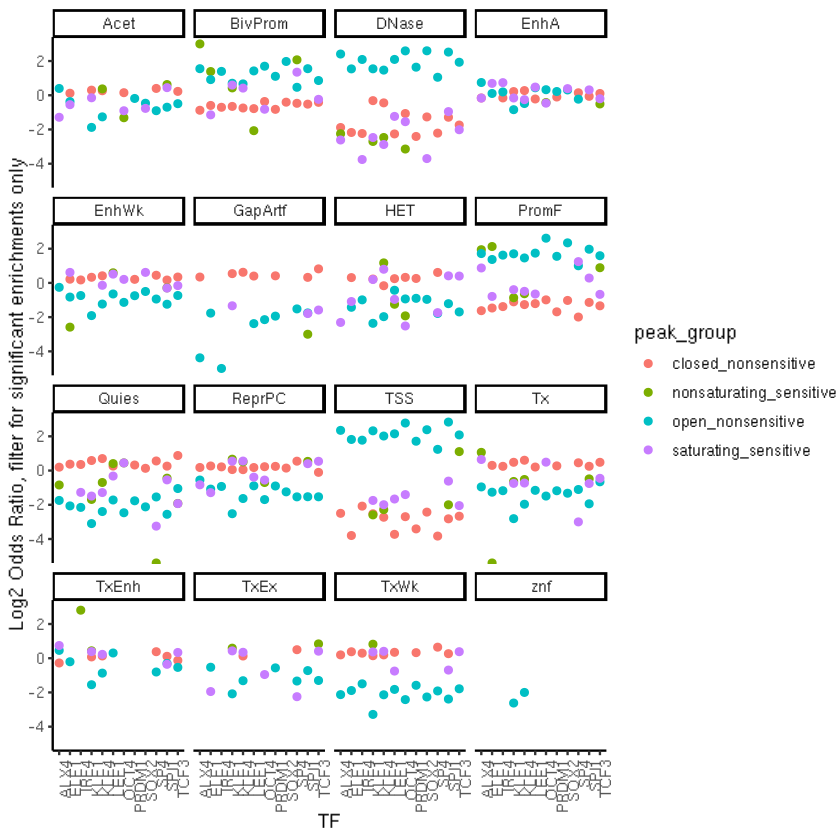

In [367]:
p3

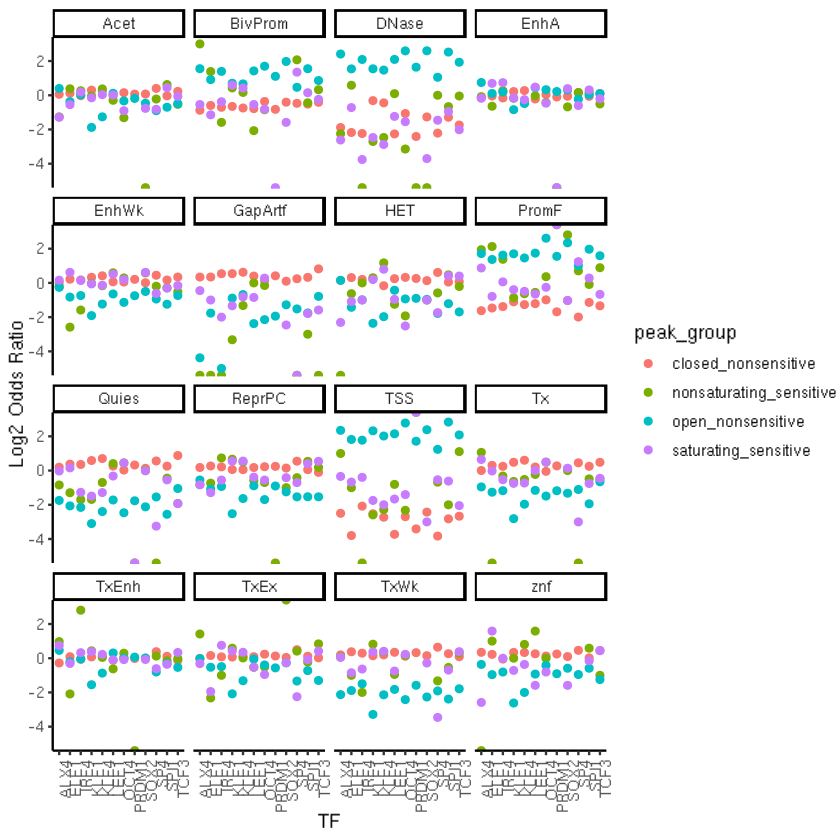

In [368]:
p1

In [22]:
# try different grid arrangement
p4 <- ggplot(alltf %>% dplyr::filter(significant==1), aes(x=TF, y=as.numeric(log2fc), color=peak_group)) + geom_point() + theme_classic() +
facet_wrap(~state_group, ncol=2) + theme(axis.text.x=element_text(angle=90, hjust=1)) + 
ylab("Log2 Odds Ratio, filter for significant enrichments only") + 
geom_hline(yintercept=0, linetype="dashed") + scale_color_manual(values=c("saturating_sensitive"="#1F77B4", 
                                                                         "nonsaturating_sensitive"="#FF7F0E", 
                                                                         "open_nonsensitive"="#2CA02C", 
                                                                         "closed_nonsensitive"="#D62728"))


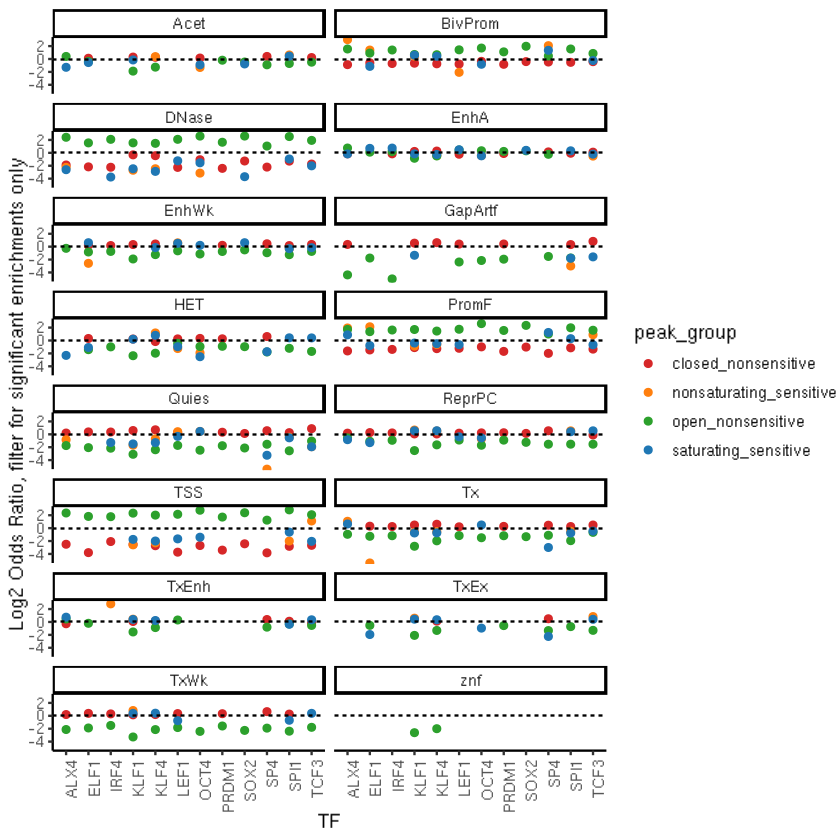

In [23]:
p4

In [24]:
pdf(paste0(plotdir, "/all_tf_chromhmm_enrichment_heatmap_v2.pdf"), height=9, width=5)
print(p4)
dev.off()

png 
  2